# Dataset-link
1)[Covid Chest X Ray Dataset][1]

2)[Pneumonia dataset by Praveen][2]

[1]:https://github.com/ieee8023/covid-chestxray-dataset

[2]:https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

## Dataset creation

In [5]:
import pandas as pd
import numpy as np
import os

In [4]:
!pip install pandas
!pip install numpy
!pip install os
!pip install opencv-python

  Using cached pandas-1.2.4-cp37-cp37m-win_amd64.whl (9.1 MB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


ERROR: Could not find a version that satisfies the requirement os
ERROR: No matching distribution found for os


  Using cached opencv_python-4.5.1.48-cp37-cp37m-win_amd64.whl (34.9 MB)


In [6]:
datapath1='F:\\Anaconda\\envs\\covidprediction\\dataset\\covid-chestxray-dataset-master\\covid-chestxray-dataset-master'
dataset_path='F:\\Anaconda\\envs\\covidprediction\\dataset\\finaldata'

catagories=os.listdir(dataset_path)
print(catagories)

dataset=pd.read_csv(os.path.join(datapath1,'metadata.csv'))
findings=dataset['finding']
image_names=dataset['filename']

['covidnegative', 'covidpositive']


In [7]:
positive_index=np.concatenate((np.where(findings=='Pneumonia/Viral/COVID-19')[0],np.where(findings=='Pneumonia/Viral/SARS')[0]))
positive_image_name=image_names[positive_index]

In [8]:
import cv2

for positive_image_name in positive_image_name:
    image=cv2.imread(os.path.join(datapath1,'images',positive_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,catagories[1],positive_image_name),image)
    except Exception as e:
        print(e)    

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\ap

In [9]:
datapath2='F:\\Anaconda\\envs\\covidprediction\\dataset\\covidnegativeset'

dataset=pd.read_csv(os.path.join(datapath2,'Chest_xray_Corona_Metadata.csv'))
findings=dataset['Label']
image_names=dataset['X_ray_image_name']

In [10]:
negative_index=np.where(findings=='Normal')[0]
negative_image_name=image_names[negative_index]
for negative_image_name in negative_image_name:
    image=cv2.imread(os.path.join(datapath2,'train',negative_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,catagories[0],negative_image_name),image)
    except Exception as e:
        print(e)    

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgcodecs\src\loadsave.cpp:753: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

OpenCV(4.5.1) C:\Users\ap

## Data preprocessing

In [11]:
dataset_path='F:\\Anaconda\\envs\\covidprediction\\dataset\\finaldata'
catagories=os.listdir(dataset_path)
labels=[i for i in range(len(catagories))]
label_dict=dict(zip(catagories,labels))
print(catagories)
print(label_dict)
print(labels)

['covidnegative', 'covidpositive']
{'covidnegative': 0, 'covidpositive': 1}
[0, 1]


In [12]:
img_size=100
data=[]
target=[]

for category in catagories:
    folderpath=os.path.join(dataset_path,category)
    img_names=os.listdir(folderpath)

    for img_name in img_names:
        img_path=os.path.join(folderpath,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print(e)      

In [13]:
#converting the all image pixels to a value between 0 & 1 
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)



In [14]:
np.save('data',data)
np.save('target',new_target)


In [15]:
data=np.load('data.npy')
target=np.load('target.npy')

## CNN MODEL TRAINING

In [18]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inputs=inp, outputs=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0

In [20]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [21]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
49/49 [==============================] - 277s 6s/step - loss: 0.6937 - accuracy: 0.7192 - val_loss: 0.1451 - val_accuracy: 0.9480
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
49/49 [==============================] - 270s 6s/step - loss: 0.1709 - accuracy: 0.9498 - val_loss: 0.1031 - val_accuracy: 0.9595
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
49/49 [==============================] - 269s 5s/step - loss: 0.2348 - accuracy: 0.9241 - val_loss: 0.2261 - val_accuracy: 0.9364
Epoch 4/20
49/49 [==============================] - 270s 6s/step - loss: 0.1555 - accuracy: 0.9538 - val_loss: 0.1419 - val_accuracy: 0.9653
Epoch 5/20
49/49 [==============================] - 223s 5s/step - loss: 0.0961 - accuracy: 0.9654 - val_loss: 0.0886 - val_accuracy: 0.9711
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20
49/49 [==============================] - 213s 4s/step - loss: 0.0713 - accuracy: 0.9737 - val_loss: 0.0965 - v

Matplotlib is building the font cache; this may take a moment.


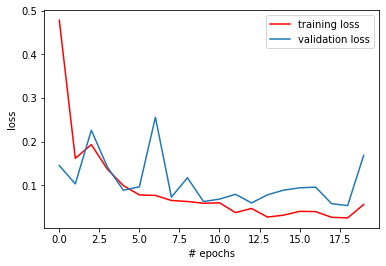

In [23]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

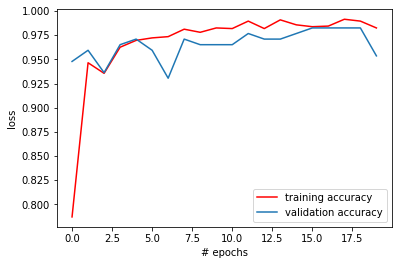

In [24]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
model.save('C:/Users/user/PycharmProjects/covid xray')

INFO:tensorflow:Assets written to: C:/Users/user/PycharmProjects/covid xray\assets
